In [2]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

In [89]:
scores = pd.DataFrame(
    {
        "Drug": [
            "Thiopurines","Thiopurines (Crohn's Disease)", "Thiopurines (Ulcerative colitis)", "Thiopurines (Rheumatologic conditions)",
             "Azathioprine", "6-Mercaptopurine", "5-ASA", 
            "Infliximab", "Adalimumab", "Certolizumab", "Golimumab", "Vedolizumab", 
            "Ustekinumab", "Tofacitinib"
            ],
        "Events": [1739, 543, 151, 66,
        1488, 251, 791, 542, 906, 1, 48, 68, 72, 56],
        "ROR": [18.22, 34.61, 8.94, 18.87,
        19.18, 13.30, 17.44, 1.15, 0.62, 1.64, 0.57, 1.37, 0.88, 0.30],
        "95% CI low": [17.36, 30.95, 7.47, 14.72,
        18.21, 11.73, 16.24, 1.06, 0.58, 0.23, 0.43, 1.08, 0.7, 0.23],
        "95% CI high": [19.12, 38.70, 10.71, 24.19,
        20.2, 15.07, 18.72, 1.26, 0.66, 11.65, 0.75, 1.74, 1.11, 0.39],
    }
)
scores

scores.loc[:, "95% CI low"] =  scores.loc[:, "ROR"] - scores.loc[:, "95% CI low"] 
scores.loc[:, "95% CI high"] =  scores.loc[:, "95% CI high"] - scores.loc[:, "ROR"]

# # scores_2 = pd.DataFrame(
# #     {
# #         "Drug": [
# #         "Events": [
# #         "ROR": [
# #         "95% CI low": [
# #         "95% CI high": [
# #     }
# # )
# # scores_2

# scores = pd.concat([scores_1, scores_2], axis="rows", ignore_index=True)
# # scores.sort_values("Drug", inplace=True, ascending=False)

scores.sort_index(ascending=False, inplace=True)
scores.reset_index(inplace=True, drop=True)
scores


,Drug,Events,ROR,95% CI low,95% CI high
0,Tofacitinib,56,0.30,0.07,0.09
1,Ustekinumab,72,0.88,0.18,0.23
2,Vedolizumab,68,1.37,0.29,0.37
3,Golimumab,48,0.57,0.14,0.18
4,Certolizumab,1,1.64,1.41,10.01
5,Adalimumab,906,0.62,0.04,0.04
6,Infliximab,542,1.15,0.09,0.11
7,5-ASA,791,17.44,1.20,1.28
8,6-Mercaptopurine,251,13.30,1.57,1.77
9,Azathioprine,1488,19.18,0.97,1.02


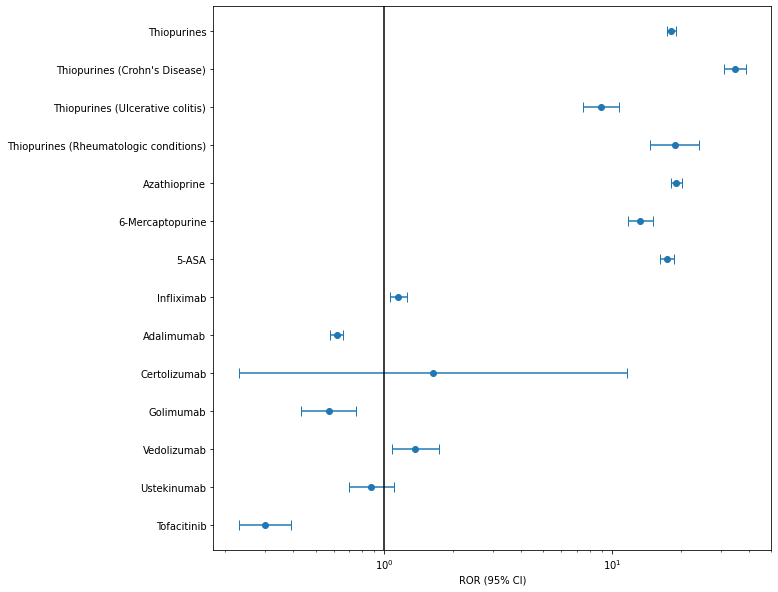

In [94]:
import numpy as np
fig, ax = plt.subplots(figsize=(10, 10))
x = scores["ROR"]
y = scores.index
xerr = np.array([(lo, hi) for lo, hi in zip(scores["95% CI low"], scores["95% CI high"])]).T
ax.errorbar(
    x=x, 
    y=y,
    xerr=xerr,
    marker="o",
    ls="none",
    capsize=5,
    # c="k",
)
# ax.set_color
ax.set_title("")
ax.set_xlabel("ROR (95% CI)")

ax.set_yticks(scores.index, scores["Drug"])
ax.set_xscale("log")
plt.axvline(x=1, c="k")
# ax.set_aspect(.4)


In [98]:
fig.savefig("ror_scores.png", dpi=200, bbox_inches='tight')